In [17]:
#supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import os
_stderr = sys.stderr
null = open(os.devnull,'wb')


import os
work_dir = 'Processed_data'


import scanpy as sc
#set some figure parameters for nice display inside jupyternotebooks.
%matplotlib inline
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(5, 5), facecolor='white')

#make a directory for to store the processed scRNA-seq data.
if not os.path.exists(os.path.join(work_dir, 'scRNA')):
    os.makedirs(os.path.join(work_dir, 'scRNA'))
    
if not os.path.exists(os.path.join(work_dir, 'data')):
    os.makedirs(os.path.join(work_dir, 'data'))

In [18]:
adata = sc.read(os.path.join(work_dir, 'scRNA/All_combined_withvelo.h5ad'), compression='gzip')

In [19]:
adata

AnnData object with n_obs × n_vars = 49123 × 36601
    obs: 'stage', 'SampleID', 'region', 'batch'
    var: 'gene_ids', 'feature_types'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [21]:
adata.obs

stage             SampleID      region batch
AAACCTGAGAATGTTG-1  PCW3  PCW3_wholebody_rep1  whole_body     0
AAACCTGAGACGCTTT-1  PCW3  PCW3_wholebody_rep1  whole_body     0
AAACCTGAGCCAGAAC-1  PCW3  PCW3_wholebody_rep1  whole_body     0
AAACCTGAGCCCAGCT-1  PCW3  PCW3_wholebody_rep1  whole_body     0
AAACCTGAGCTAACTC-1  PCW3  PCW3_wholebody_rep1  whole_body     0
...                  ...                  ...         ...   ...
TTTGTTGTCACCTGTC-2  PCW4  PCW4_wholebody_rep1  whole_body     1
TTTGTTGTCATTTCGT-2  PCW4  PCW4_wholebody_rep1  whole_body     1
TTTGTTGTCCCTTGGT-2  PCW4  PCW4_wholebody_rep1  whole_body     1
TTTGTTGTCCGGTAGC-2  PCW4  PCW4_wholebody_rep1  whole_body     1
TTTGTTGTCGATCCCT-2  PCW4  PCW4_wholebody_rep1  whole_body     1

[49123 rows x 4 columns]

In [22]:
#Basic quality control
sc.pp.filter_cells(adata, min_genes=200)

In [23]:
adata.var['MT'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['MT'], percent_top=None, log1p=False, inplace=True)
adata.var['RPS'] = adata.var_names.str.startswith('RPS')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['RPS'], percent_top=None, log1p=False, inplace=True)
adata.var['RPL'] = adata.var_names.str.startswith('RPL')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['RPL'], percent_top=None, log1p=False, inplace=True)

In [24]:
adata

AnnData object with n_obs × n_vars = 49120 × 36601
    obs: 'stage', 'SampleID', 'region', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_RPS', 'pct_counts_RPS', 'total_counts_RPL', 'pct_counts_RPL'
    var: 'gene_ids', 'feature_types', 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'RPS', 'RPL'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

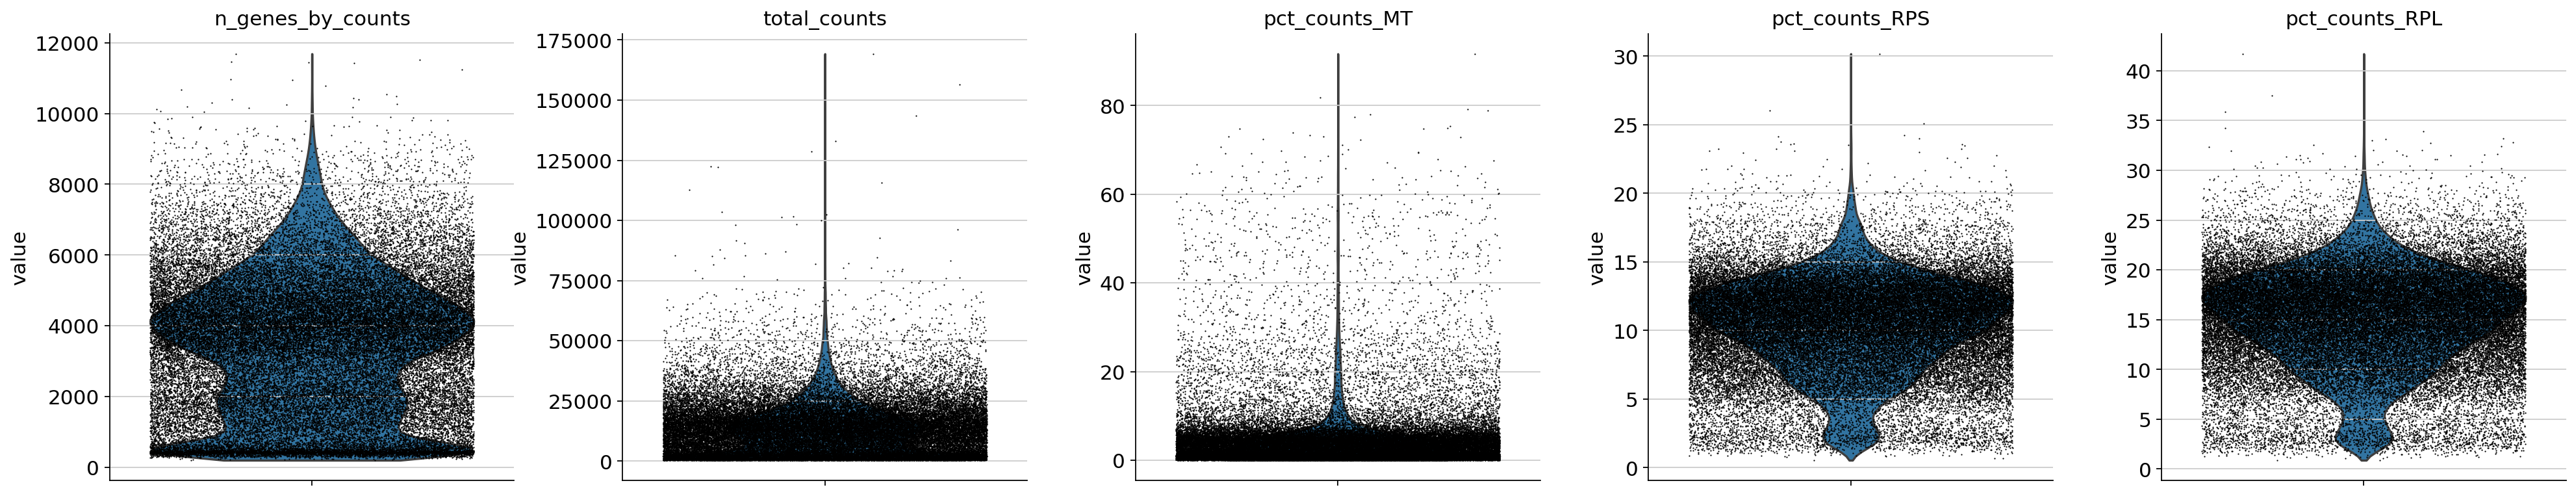

In [25]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_MT', 'pct_counts_RPS', 'pct_counts_RPL'],jitter=0.4, multi_panel=True)

In [26]:
sc.external.pp.scrublet(adata) #estimates doublets
adata.obs
adata = adata[adata.obs['predicted_doublet'] == False] #do the actual filtering
adata

/home/Karl/miniconda3/envs/main/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.78
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%


View of AnnData object with n_obs × n_vars = 49120 × 36601
    obs: 'stage', 'SampleID', 'region', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_RPS', 'pct_counts_RPS', 'total_counts_RPL', 'pct_counts_RPL', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'RPS', 'RPL'
    uns: 'scrublet'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

/tmp/ipykernel_1289155/1150361619.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['MT'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'


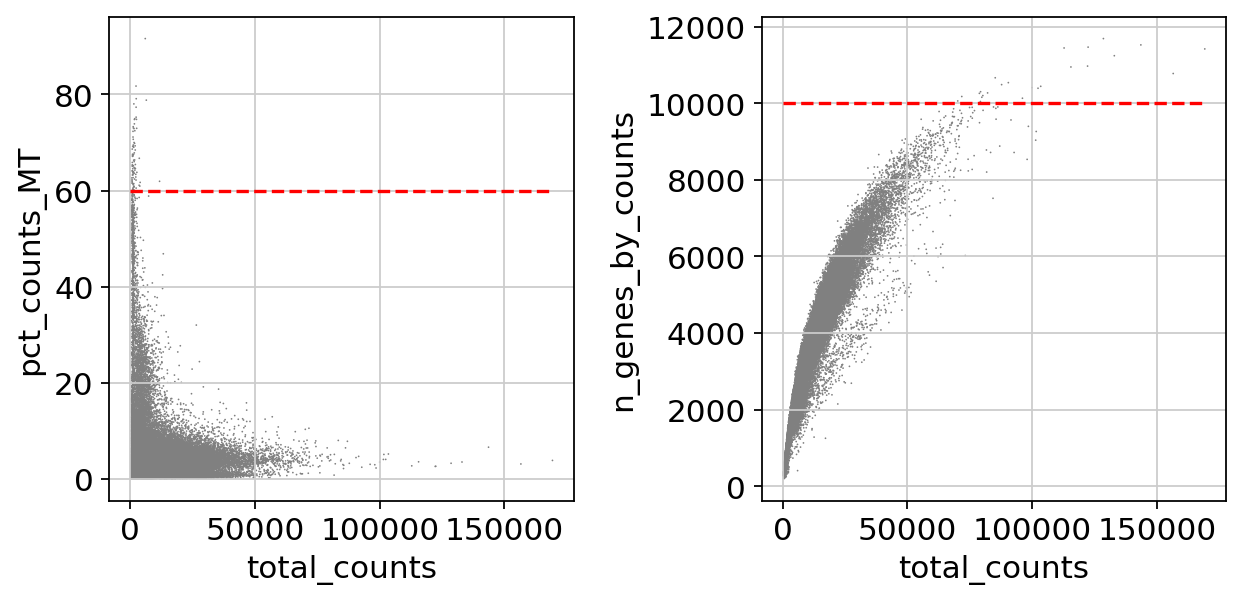

In [27]:
adata.var['MT'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['MT'], percent_top=None, log1p=False, inplace=True)
import matplotlib.pyplot as plt
mito_filter = 60
n_counts_filter = 10000
fig, axs = plt.subplots(ncols = 2, figsize = (8,4))
sc.pl.scatter(adata, x='total_counts', y='pct_counts_MT', ax = axs[0], show=False)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', ax = axs[1], show = False)
#draw horizontal red lines indicating thresholds.
axs[0].hlines(y = mito_filter, xmin = 0, xmax = max(adata.obs['total_counts']), color = 'red', ls = 'dashed')
axs[1].hlines(y = n_counts_filter, xmin = 0, xmax = max(adata.obs['total_counts']), color = 'red', ls = 'dashed')
fig.tight_layout()
plt.show()

In [28]:
adata

AnnData object with n_obs × n_vars = 49120 × 36601
    obs: 'stage', 'SampleID', 'region', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_RPS', 'pct_counts_RPS', 'total_counts_RPL', 'pct_counts_RPL', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'RPS', 'RPL'
    uns: 'scrublet'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

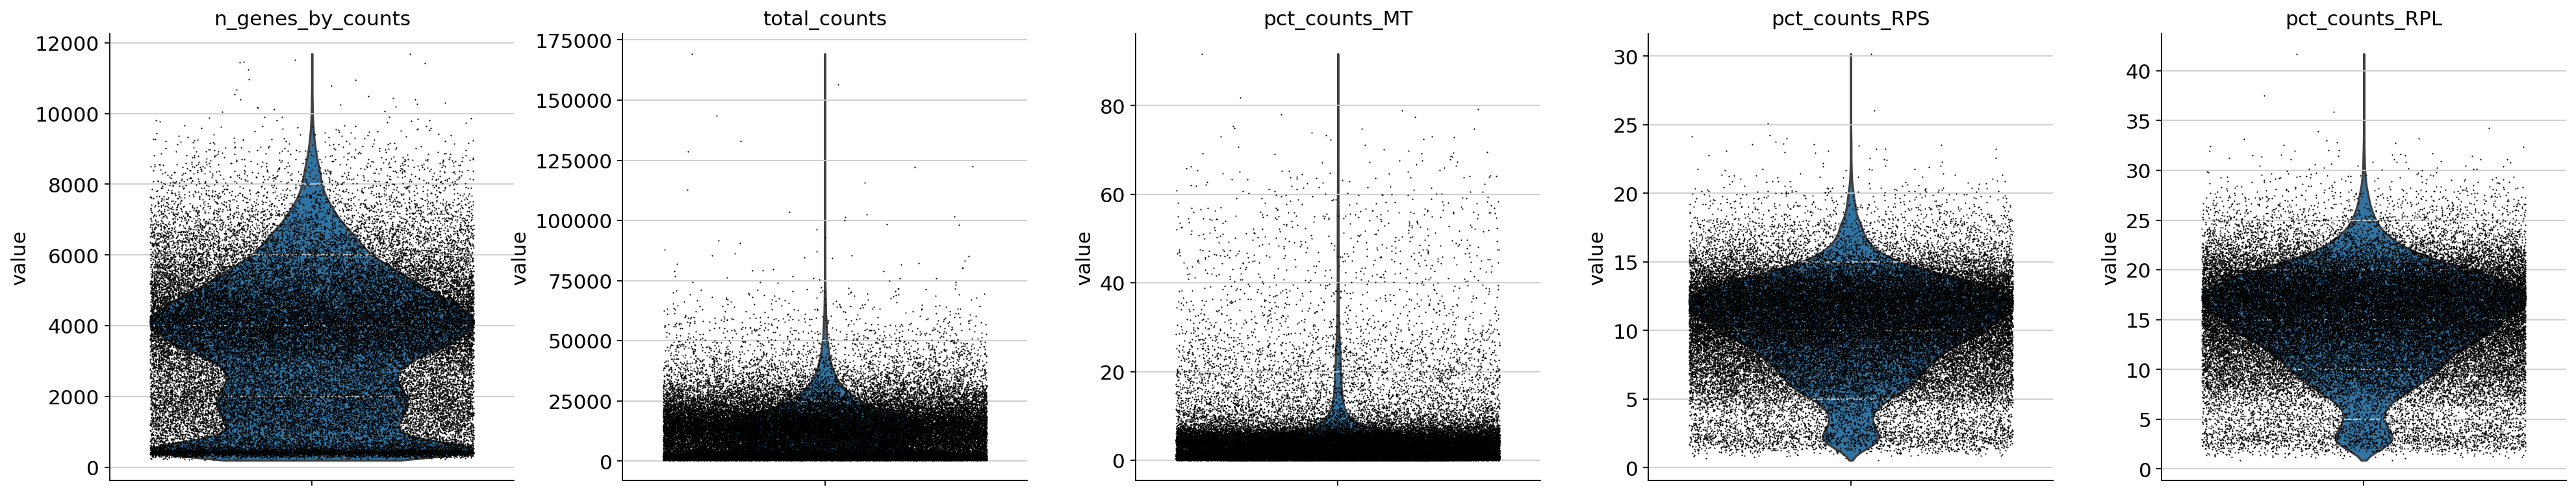

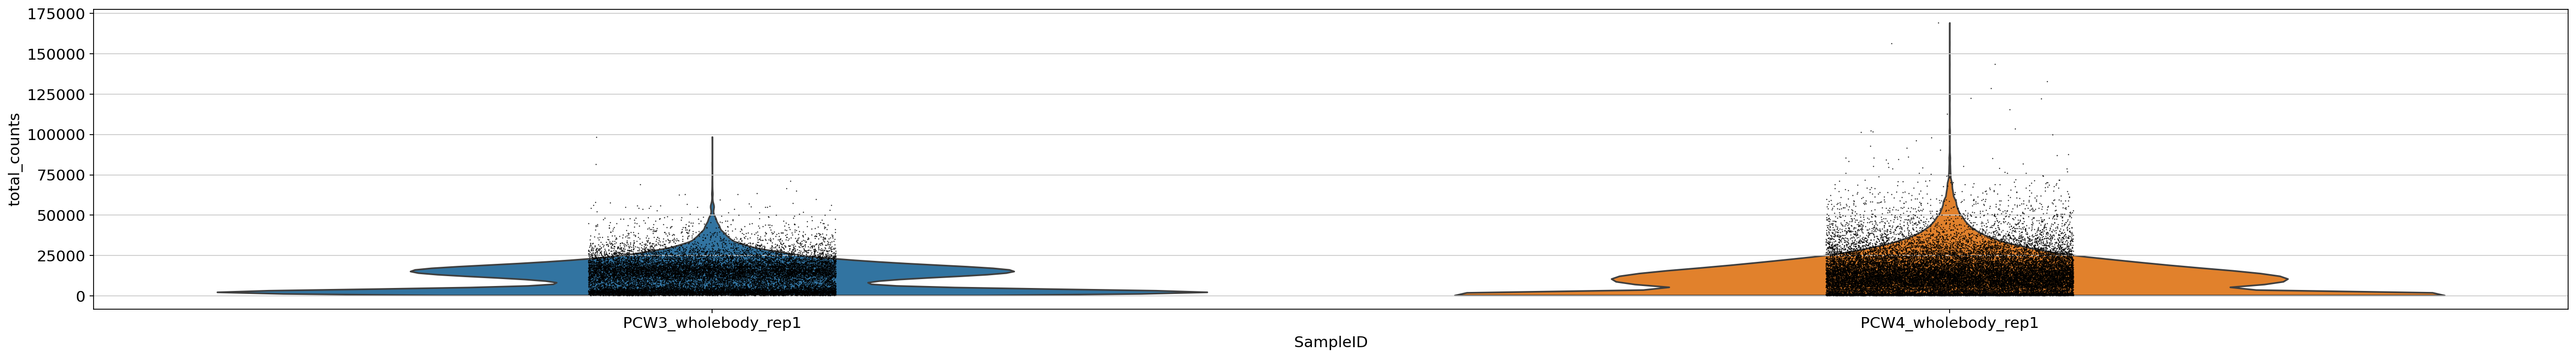

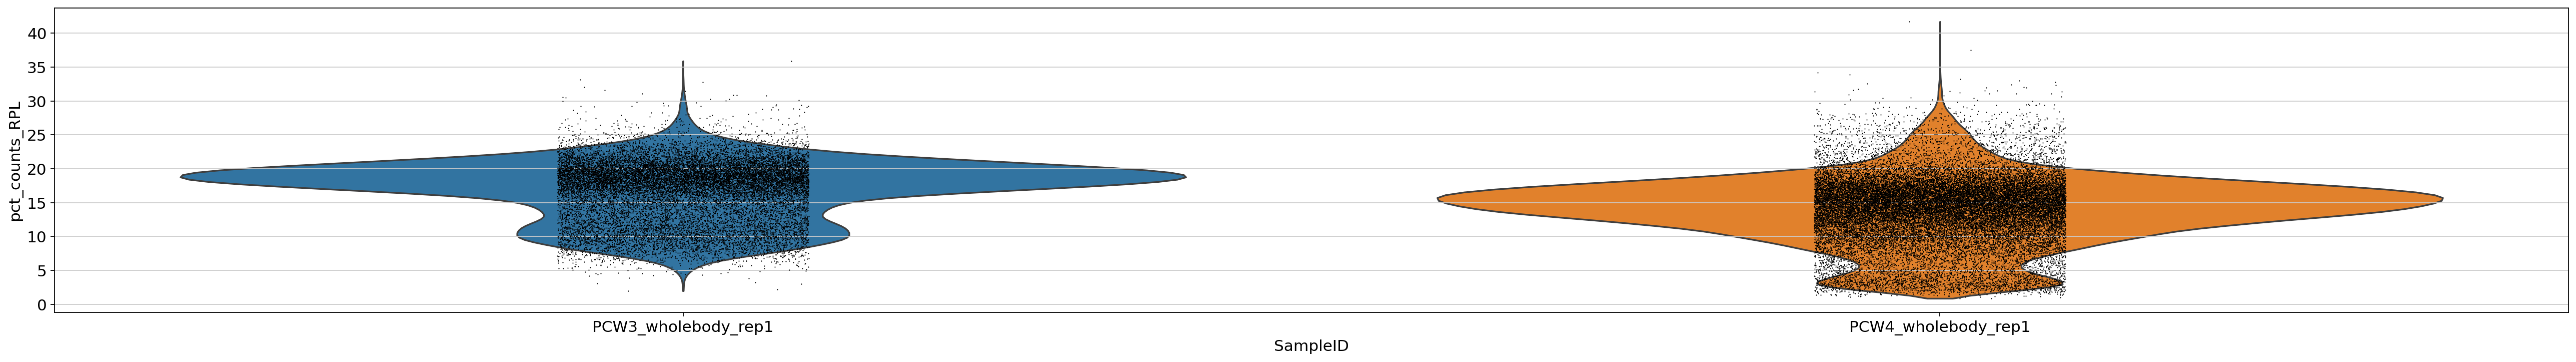

In [29]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_MT', 'pct_counts_RPS', 'pct_counts_RPL'],jitter=0.4, multi_panel=True)
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(30, 5), facecolor='white')
sc.pl.violin(adata, ['total_counts'], groupby = 'SampleID')
sc.pl.violin(adata, ['pct_counts_RPL'], groupby = 'SampleID')

In [30]:
adata = adata[adata.obs.n_genes_by_counts < n_counts_filter, :]
adata = adata[adata.obs.pct_counts_MT < mito_filter, :]
adata = adata[adata.obs.n_genes_by_counts > 1000, :]
adata = adata[adata.obs.n_genes_by_counts < 10000, :]
adata = adata[adata.obs.total_counts < 70000, :]
adata = adata[adata.obs.total_counts > 1000, :]

adata

View of AnnData object with n_obs × n_vars = 41314 × 36601
    obs: 'stage', 'SampleID', 'region', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_RPS', 'pct_counts_RPS', 'total_counts_RPL', 'pct_counts_RPL', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'RPS', 'RPL'
    uns: 'scrublet', 'SampleID_colors'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

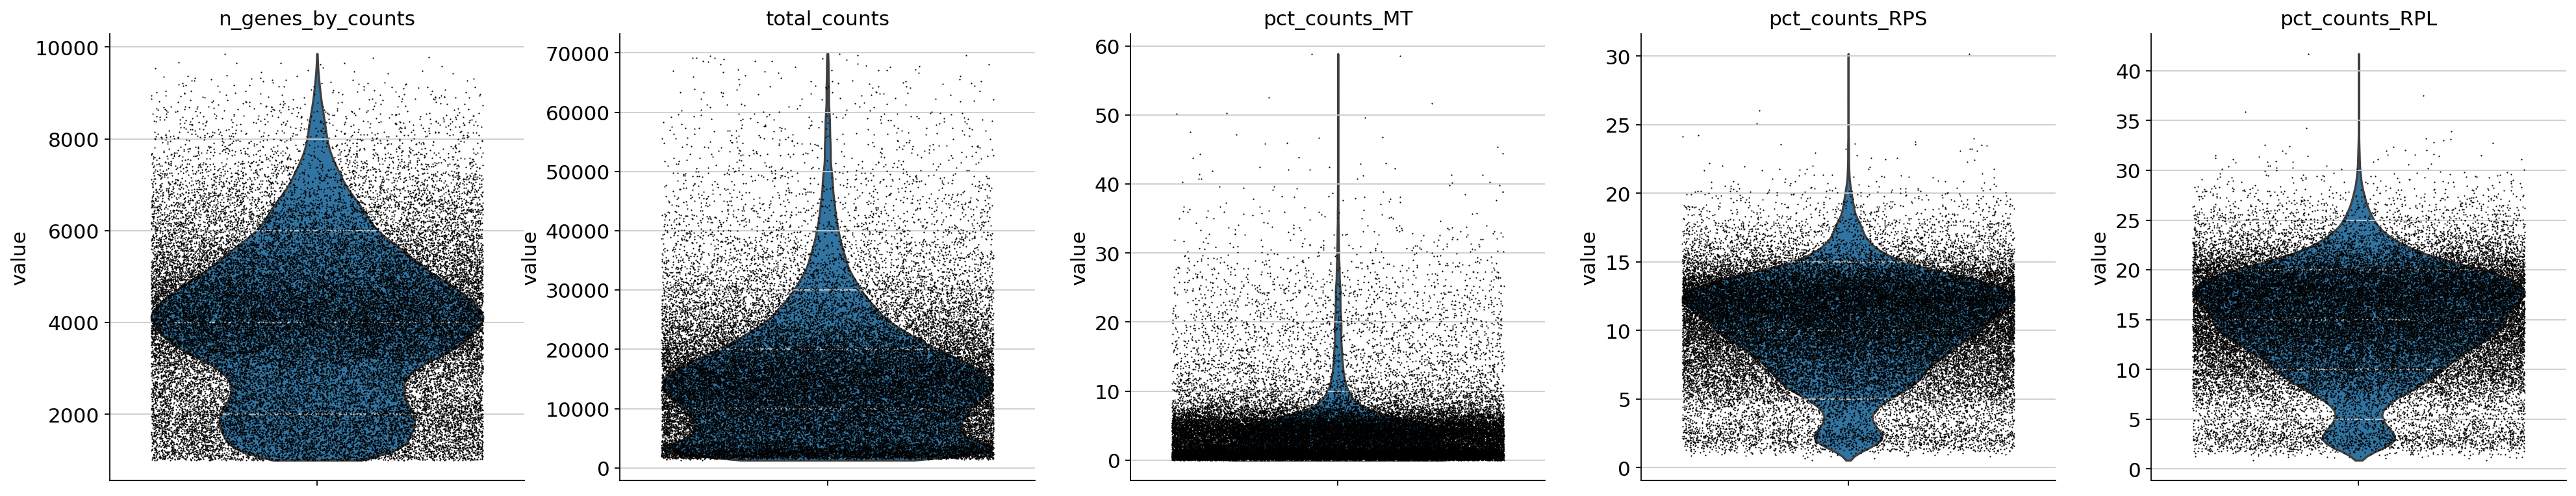

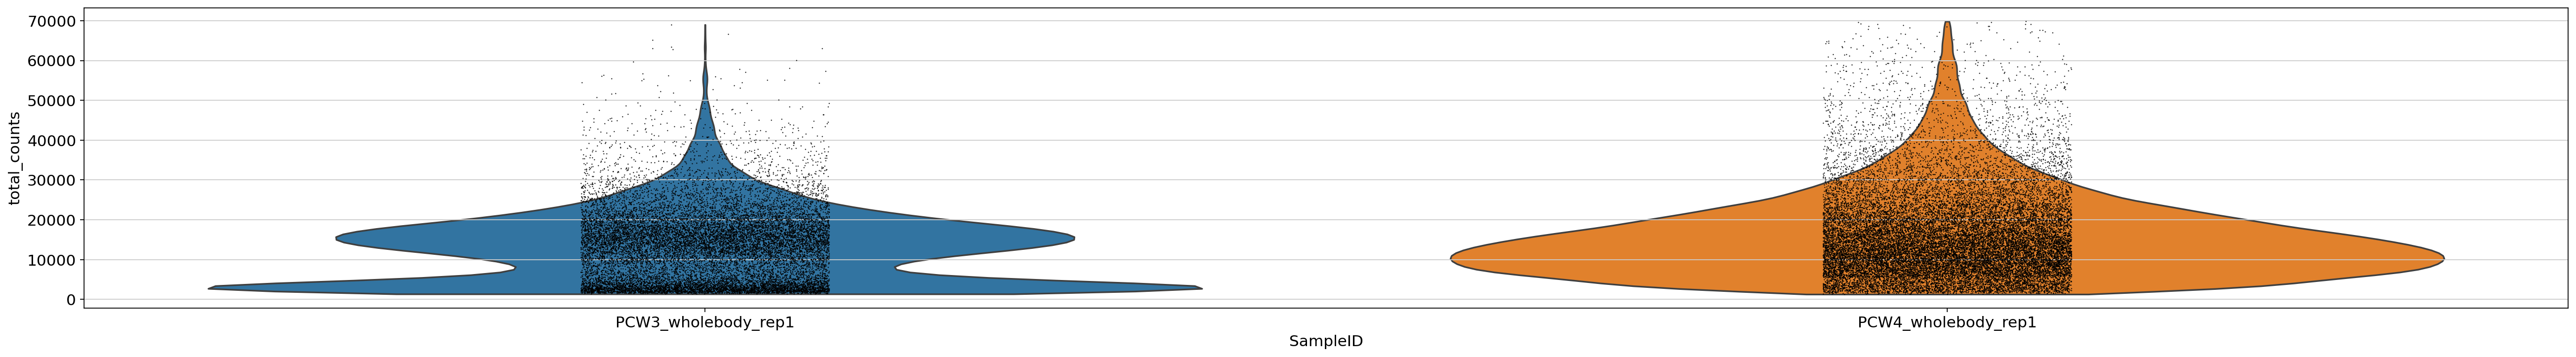

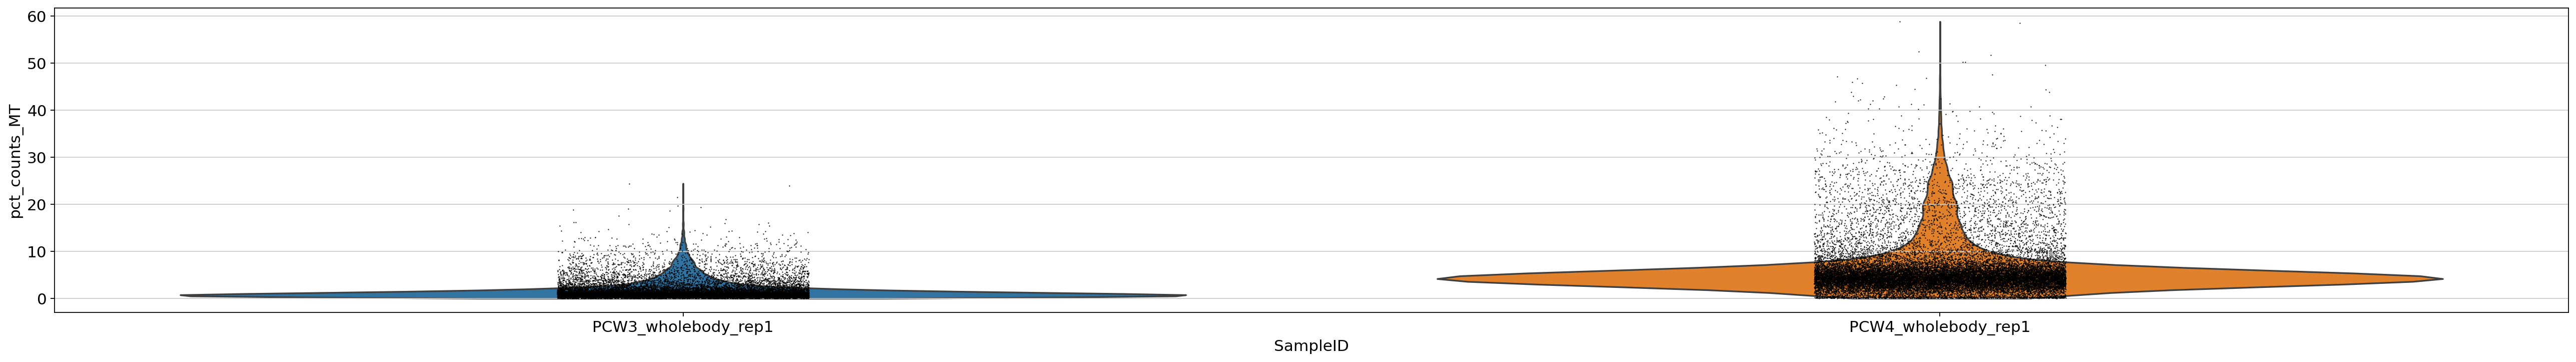

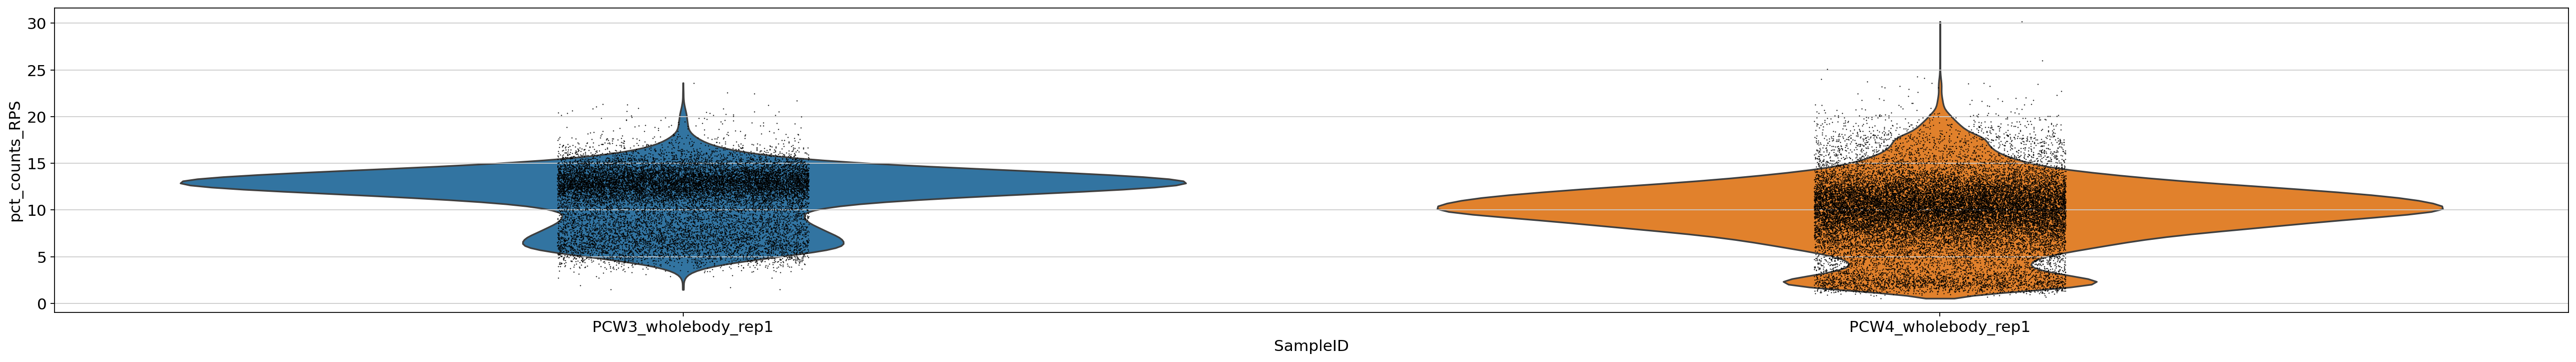

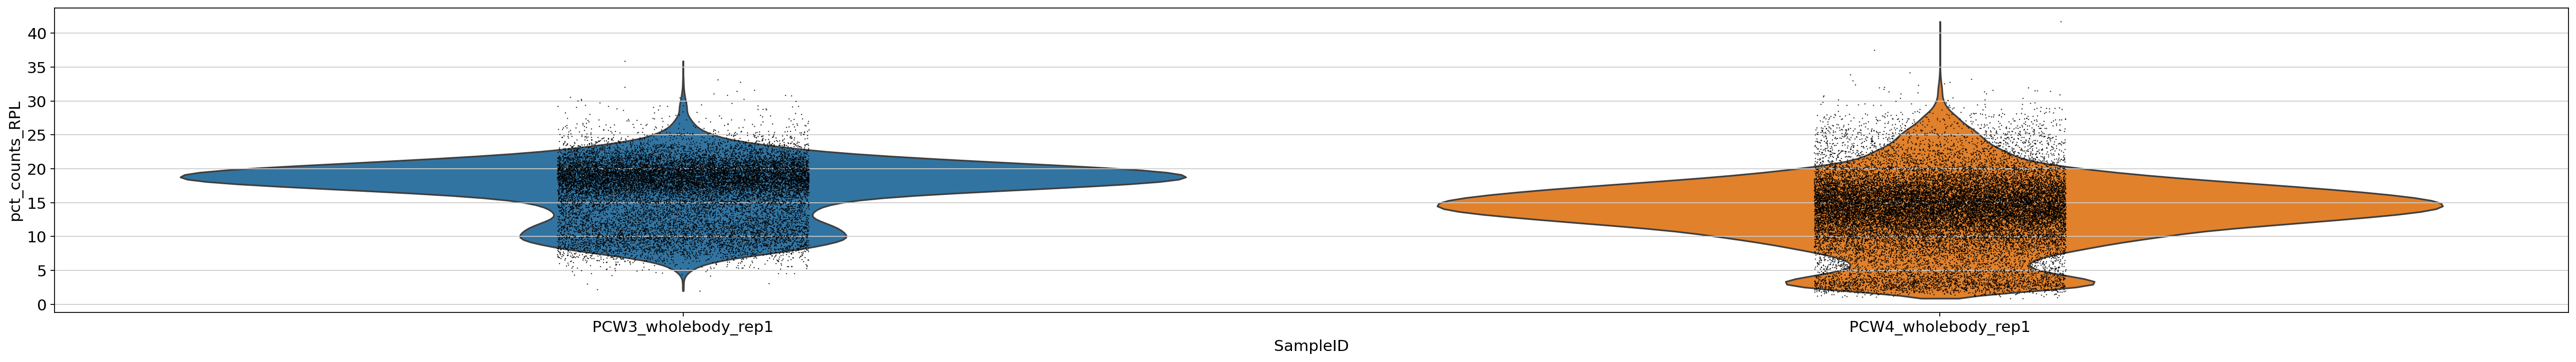

In [31]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_MT', 'pct_counts_RPS', 'pct_counts_RPL'],jitter=0.4, multi_panel=True)
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(30, 5), facecolor='white')
sc.pl.violin(adata, ['total_counts'], groupby = 'SampleID')
sc.pl.violin(adata, ['pct_counts_MT'], groupby = 'SampleID')
sc.pl.violin(adata, ['pct_counts_RPS'], groupby = 'SampleID')
sc.pl.violin(adata, ['pct_counts_RPL'], groupby = 'SampleID')

In [32]:
adata

View of AnnData object with n_obs × n_vars = 41314 × 36601
    obs: 'stage', 'SampleID', 'region', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_RPS', 'pct_counts_RPS', 'total_counts_RPL', 'pct_counts_RPL', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'RPS', 'RPL'
    uns: 'scrublet', 'SampleID_colors'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [33]:
#Data normalization
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_disp=0.05)
#sc.pp.regress_out(adata, ['pct_counts_MT', 'pct_counts_RPS', 'pct_counts_RPL'])
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
results_file = (os.path.join(work_dir, 'data/Wholeembryo_aggr_scanpy_preprocessed.h5ad'))
adata.write(results_file)

/home/Karl/miniconda3/envs/main/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
